In [16]:
#Code K-means using sklearn [AND] from scratch, i.e., both approaches.
#Use mnist and iris datasets in both cases. 
#Plot the decision boundary in both cases.
#Report accuracy, precision, recall, F1 score and confusion matrix in both cases. (Code all the metrics from scratch).
#Plot the AUC-ROC curve in both cases.
#Make a report using at least 500 words comparing the results of SKlearn and your implementation.

# K - means (sklearn) using iris dataset

In [17]:
import pandas as pd
import numpy as np
# import iris dataset
data = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\iris dataset")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


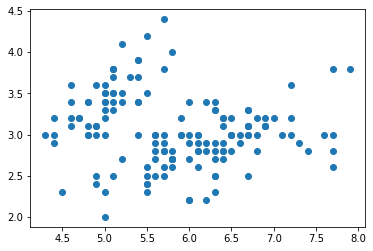

In [18]:
import matplotlib.pyplot as plt
plt.scatter(data['sepal.length'],data['sepal.width'])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

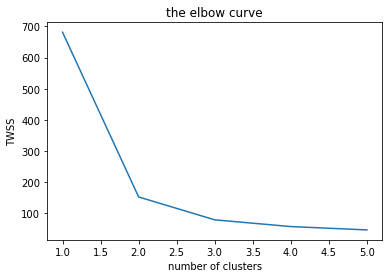

In [20]:
x = data.iloc[:, [0,1,2,3]].values
twss = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    twss.append(kmeans.inertia_)
plt.plot(range(1,6),twss)
plt.title('the elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('TWSS')
plt.show()

In [22]:
x = data.iloc[:, [0,1,2,3]].values

km = KMeans(n_clusters = 3, init = 'k-means++' , max_iter = 300 , random_state = 0)
y_pred = km.fit_predict(x)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


ValueError: x and y must be the same size

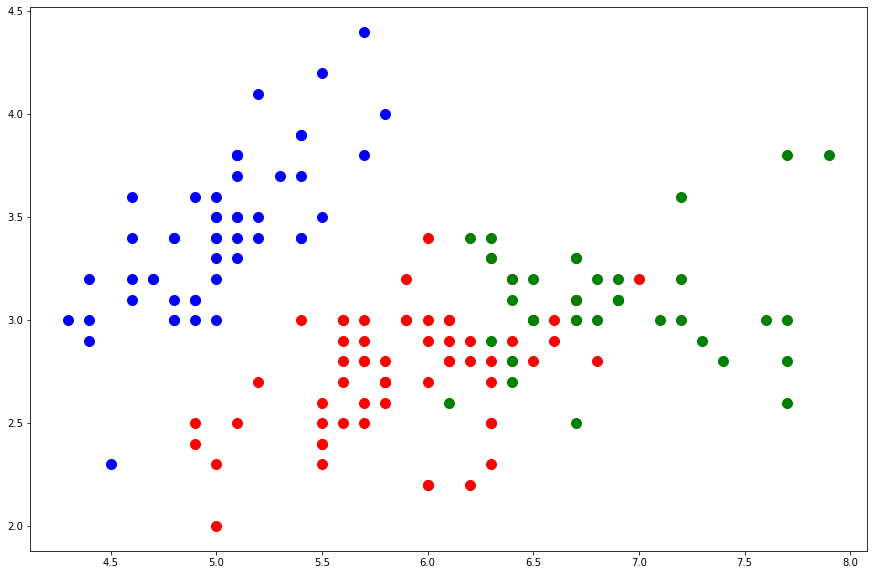

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(x[y_pred==0,0],x[y_pred == 0,1],s=100,c = 'red')
plt.scatter(x[y_pred==1,0],x[y_pred == 1,1],s=100,c = 'blue')
plt.scatter(x[y_pred==2,0],x[y_pred == 2,1],s=100,c = 'green')
plt.scatter(km.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=250,marker='*',c='white',edgecolor='black',label='centroids')

plt.show()

In [24]:
X = data.drop(["variety"],axis=1)
Y = data["variety"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [25]:
Y_pred=dts.predict(X_test)
s=pd.DataFrame({'Y_test':Y_test,'Y_pred':Y_pred})
confusion_matrix = pd.crosstab(s['Y_test'], s['Y_pred'])
print (confusion_matrix)

NameError: name 'dts' is not defined

In [26]:
fig=plt.figure(figsize=(10,5))
import seaborn as sn
mapp=sn.heatmap(confusion_matrix,annot=True)
mapp.set(xlabel='Actual Values',ylabel='Predicted Values',title='CONFUSION MATRIX')

NameError: name 'confusion_matrix' is not defined

<Figure size 720x360 with 0 Axes>

# K - means (sklearn) using MNIST dataset

In [27]:
import pandas as pd
datatrain = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\mnist_train.csv.xls")
datatest = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\mnist_test.csv.xls")

In [28]:
datatrain

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='random',n_init=10)
model.fit(datatrain)
val = model.fit(datatrain)
c = model.predict(datatrain)
s = model.cluster_centers_
lab = model.labels_
s

array([[3.03636041, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [4.21254028, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.26726534, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.60800134, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [6.29676118, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.57772021, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# K - means from strach using iris dataset

In [ ]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

In [ ]:
   def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

plt.scatter(x[:,0], x[:,1], s=150)
plt.show()

colors = 10*["g","r","c","b","k"]


class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(x=data[:,0],y=data[:,1],c=labels)
plt.scatter(x=clusterCenters[:,0],y=clusterCenters[:,1],c='red',marker='*',s=250)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
plt.figure(figsize = (8,8))
a= np.arange(start=min(data[:,0])-1,stop=max(data[:,0])+1,step=0.02)
b= np.arange(start=min(data[:,1])-1,stop=max(data[:,1])+1,step=0.02)
arr=np.array([xx.ravel(),yy.ravel()]).T 
kmeans = KMeans(n_clusters=3,init='random',n_init=10)
kmeans.fit(data[:,:2])
y_pred = kmeans.predict(data[:,:2])
l=kmeans.predict(arr)`
plt.contourf(xx,yy,l.reshape(xx.shape),alpha=0.3)
plt.scatter(data[:,0],data[:,1],c=y_pred,cmap='inferno_r')